<a href="https://colab.research.google.com/github/semaHbo/ev-enerji-tahmini/blob/main/Model_Training/SVR_FeaturePlus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import drive

drive.mount('/content/drive')
drive.mount('/content/drive')
train_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/train_plus.csv', index_col='date', parse_dates=True)
val_df = pd.read_csv('/content/drive/MyDrive/ev-enerji-tahmini/val_plus.csv', index_col='date', parse_dates=True)

X_train = train_df.drop(columns=['Enerji_Tuketimi'])
y_train = train_df['Enerji_Tuketimi']

X_val = val_df.drop(columns=['Enerji_Tuketimi'])
y_val = val_df['Enerji_Tuketimi']

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_val)


In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(" SVR Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

 SVR Performansı:
MAE  : 44.2967
MSE  : 9793.1481
RMSE : 98.9603
R²   : 0.0277


In [ ]:
y_train_log = np.log1p(y_train)

In [ ]:
svr_log = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_log.fit(X_train, y_train_log)

# Tahmin
y_pred_log = svr_log.predict(X_val)

#Geri dönüstürme
y_pred = np.expm1(y_pred_log)


In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(" SVR Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


 SVR Performansı:
MAE  : 61.4238
MSE  : 12083.1601
RMSE : 109.9234
R²   : -0.1996


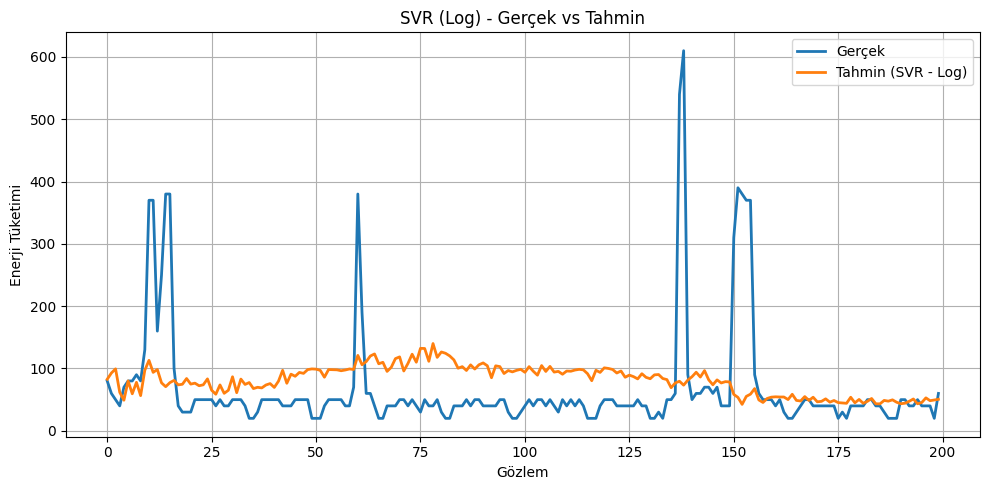

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_val.values[:200], label="Gerçek", linewidth=2)
plt.plot(y_pred[:200], label="Tahmin (SVR - Log)", linewidth=2)
plt.title("SVR (Log) - Gerçek vs Tahmin")
plt.xlabel("Gözlem")
plt.ylabel("Enerji Tüketimi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Log dönüsümü yapilmamali

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}

In [ ]:
svr = SVR()

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)  # dönüşümsüz

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
best_svr = SVR(C=1, epsilon=0.01, kernel='rbf')
best_svr.fit(X_train, y_train)

y_pred_best = best_svr.predict(X_val)


In [ ]:
mae = mean_absolute_error(y_val, y_pred_best)
mse = mean_squared_error(y_val, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_best)

print(" Final SVR  Performansı:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


 Final SVR  Performansı:
MAE  : 43.6508
MSE  : 10095.4106
RMSE : 100.4759
R²   : -0.0023
